In [1]:
from IPython.core.display import HTML, Image
css_file = 'msc/custom.css' 
HTML(open(css_file, 'r').read())

/*
Placeholder for custom user CSS

mainly to be overridden in profile/static/custom/custom.css

This will always be an empty file in IPython
*/

# *grmToolbox* 

Let us consider the different roles we play when estimating the generalized Roy model in our research.

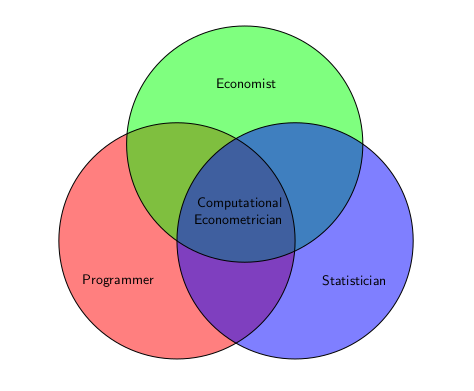

In [2]:
Image(filename='images/venn_diagram.png', width=1000)

Building a toolbox is an attempt to separate the roles as much as possible. 


Let us check out our [online](https://github.com/grmtoolbox) presence on *GitHub*. We also have prepared some [online documentation](http://grmtoolbox.github.io/) using *GitHub Pages*. Before we get started, let us import some basic libraries.

In [3]:
# Unix Pattern Extensions
import glob

# System-specific parameters and functions
import sys

# Operating System Interfaces
import os

# Scientific Computing 
import numpy as np

# High-level File Operations
import shutil

# Notebook Displays
from IPython.display import display, HTML, Image

Download the recent release:

In [15]:
%%bash

# Download archived file to working directory
wget -O grmToolbox.tar.gz https://github.com/grmToolbox/grmToolbox/archive/v1.1.0.tar.gz

# Unpack file
tar -xvf grmToolbox.tar.gz

# Renaming
mv grmToolbox-1.1.0 grmToolbox

# Copy example to current working directory
cp -r grmToolbox/example .

grmToolbox-1.1.0/
grmToolbox-1.1.0/COPYING
grmToolbox-1.1.0/README.md
grmToolbox-1.1.0/__init__.py
grmToolbox-1.1.0/bin/
grmToolbox-1.1.0/bin/grmToolbox-clean
grmToolbox-1.1.0/bin/grmToolbox-estimate
grmToolbox-1.1.0/bin/grmToolbox-perturb
grmToolbox-1.1.0/bin/grmToolbox-simulate
grmToolbox-1.1.0/bin/grmToolbox-terminate
grmToolbox-1.1.0/clsCrit.py
grmToolbox-1.1.0/clsEffects.py
grmToolbox-1.1.0/clsGrm.py
grmToolbox-1.1.0/clsMax.py
grmToolbox-1.1.0/clsMeta.py
grmToolbox-1.1.0/clsModel.py
grmToolbox-1.1.0/clsParas.py
grmToolbox-1.1.0/clsRequest.py
grmToolbox-1.1.0/clsRslt.py
grmToolbox-1.1.0/dat/
grmToolbox-1.1.0/dat/testData_A.dat
grmToolbox-1.1.0/dat/testInit_A.ini
grmToolbox-1.1.0/dat/testInit_B.ini
grmToolbox-1.1.0/dat/testInit_C.ini
grmToolbox-1.1.0/dat/testInit_D.ini
grmToolbox-1.1.0/dat/testInit_E.ini
grmToolbox-1.1.0/example/
grmToolbox-1.1.0/example/dataset.dat
grmToolbox-1.1.0/example/init.ini
grmToolbox-1.1.0/grmToolbox.py
grmToolbox-1.1.0/modMaxInterface.py
grmToolbox-1.1.0/

--2015-05-27 11:38:45--  https://github.com/grmToolbox/grmToolbox/archive/v1.1.0.tar.gz
Resolving github.com (github.com)... 192.30.252.128
Connecting to github.com (github.com)|192.30.252.128|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/grmToolbox/grmToolbox/tar.gz/v1.1.0 [following]
--2015-05-27 11:38:50--  https://codeload.github.com/grmToolbox/grmToolbox/tar.gz/v1.1.0
Resolving codeload.github.com (codeload.github.com)... 192.30.252.146
Connecting to codeload.github.com (codeload.github.com)|192.30.252.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 610808 (596K) [application/x-gzip]
Saving to: ‘grmToolbox.tar.gz’

     0K .......... .......... .......... .......... ..........  8% 1,34M 0s
    50K .......... .......... .......... .......... .......... 16% 2,81M 0s
   100K .......... .......... .......... .......... .......... 25% 10,1M 0s
   150K .......... .......... .......... .......... .

Before we turn to the program’s features, we need to modify our *PATH* variable quick access to the controls. 

In [5]:
# String that prepends to PATH
str_ = 'export PATH=' + os.getcwd() + '/grmToolbox/bin:$PATH'

# Construct absolute path of $HOME/.profile
FIlE = os.environ['HOME'] + '/.profile'

# Check if path already extended
PATH_UNDEFINED = (str_ in open(FIlE).read())

# Modify $HOME/.profile
if not PATH_UNDEFINED:
    with open(FIlE, 'a') as file_:
        file_.write(str_ + '\n')

## Explore

Let us explore the capabilities of the toolbox following the [online documentation](http://grmtoolbox.github.io). For a more advanced example of a computational toolbox, check out [structToolbox](http://structtoolbox.github.io).

Again, the model and our estimation request is stated in our initialization file. Details are available [here](http://grmtoolbox.github.io/programInstructions.html).

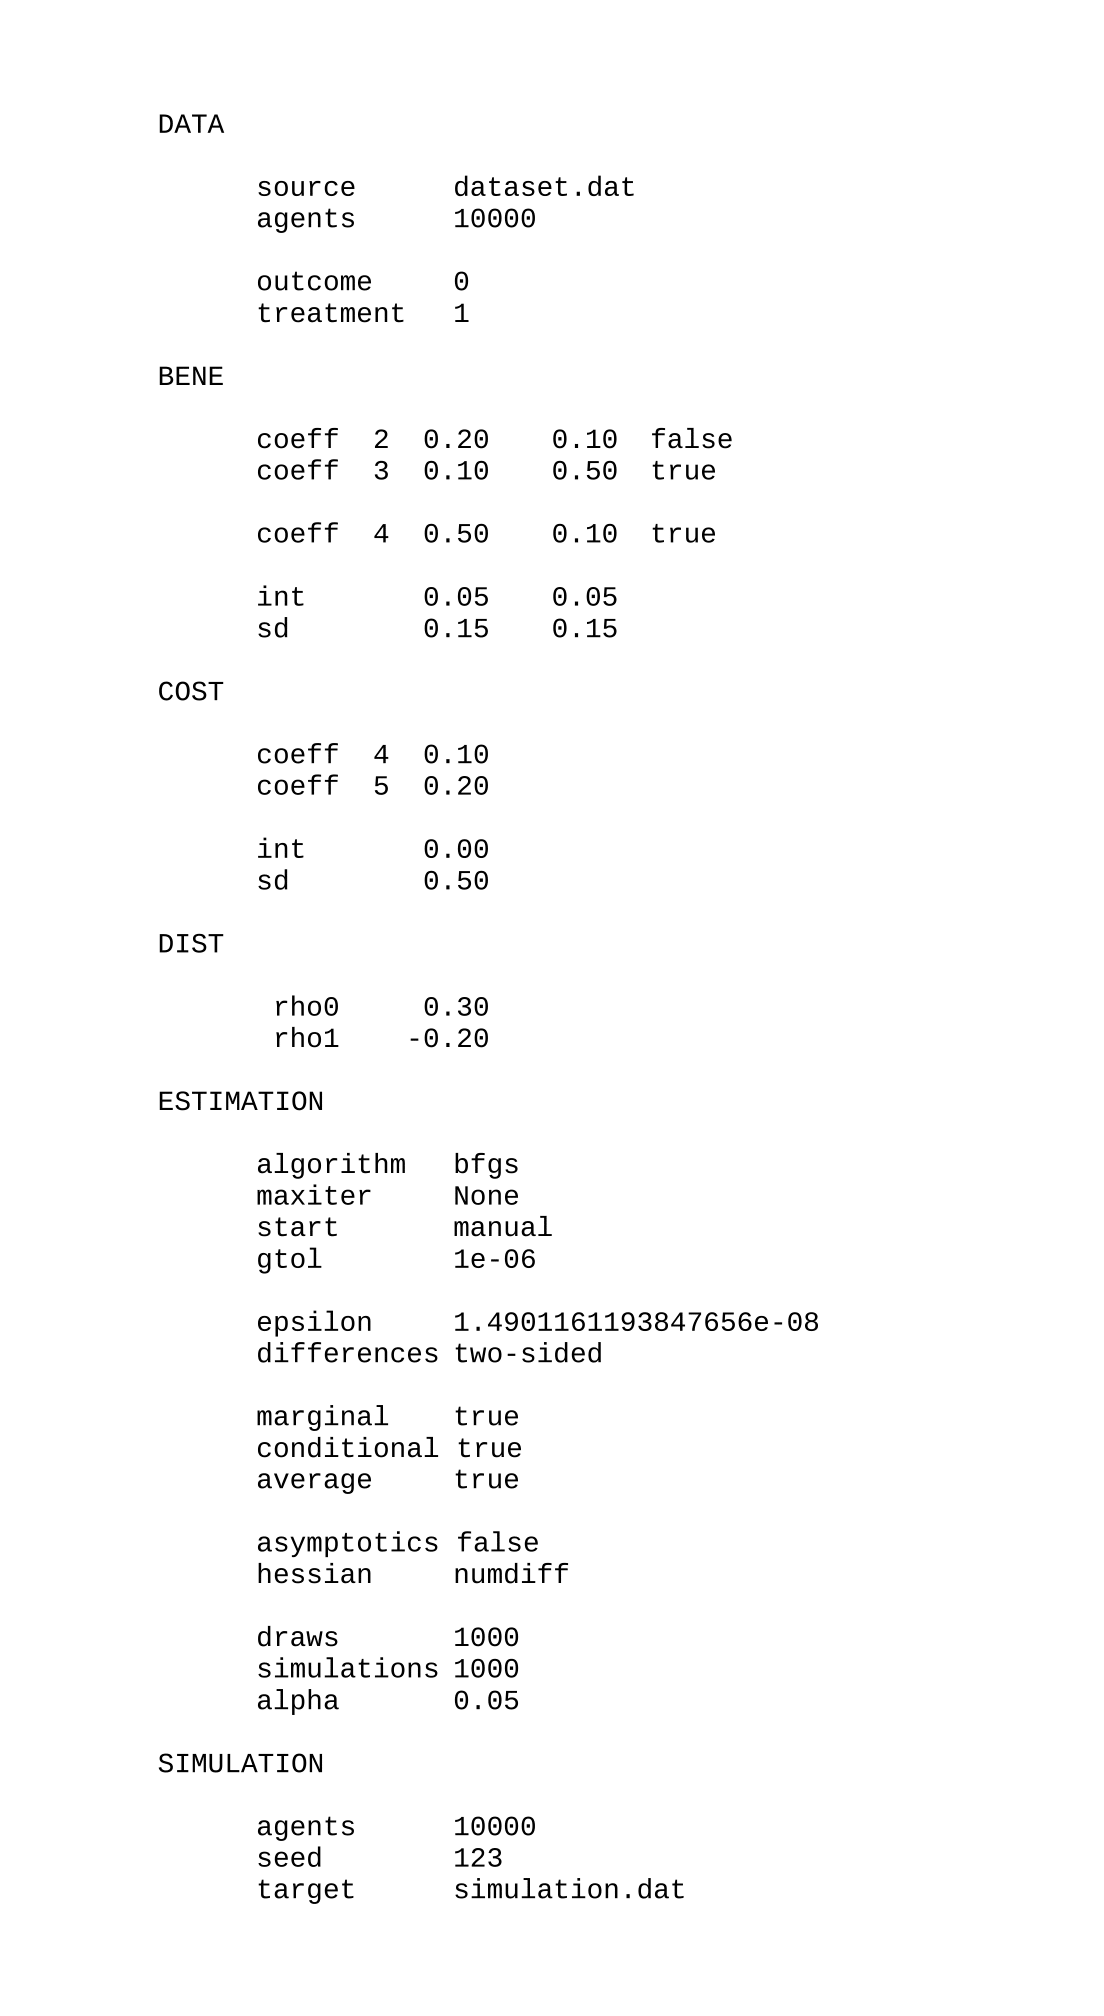

In [6]:
Image(filename='images/init.png')

**Commands**

* *grmToolbox-estimate*
        Run an estimation with the current configuration

* *grmToolbox-simulate*
        Create data simulated using the current values of the 
        structural parameters.

* *grmToolbox-terminate*
        Terminate the optimization algorithm.

* *grmToolbox-perturb*
        Perturb the current set of structural parameters.

* *grmToolbox-clean*
        Cleanup after estimation run
        
We can use the terminal to obtain additional information about these commands.

In [7]:
%%bash
grmToolbox-simulate -h

usage: grmToolbox-simulate [-h] [--init INIT] [--update]

Start simulation using the grmToolbox.

optional arguments:
  -h, --help   show this help message and exit
  --init INIT  source for model configuration (default: init.ini)
  --update     update structural parameters (default: False)


Let's now turn to the example. What files are contained in the directory and what role do they play.

example/

      dataset.dat
      init.ini

However, the agent count in the observed and simulated datasets is very high. In order to save some time, let us reduce the number of agents to 2,000.

In [21]:
%%bash
cd example
grmToolbox-simulate
cp simulation.dat dataset.dat

Let us explore the estimation command and run an estimation on the example.

In [8]:
%%bash
grmToolbox-estimate -h

usage: grmToolbox-estimate [-h] [--resume] [--simulation] [--init INITFILE]

Start estimation run using the grmToolbox.

optional arguments:
  -h, --help       show this help message and exit
  --resume         resume estimation run (default: False)
  --simulation     use SIMULATION information (default: False)
  --init INITFILE  source for model configuration (default: init.ini)


In [9]:
%%bash

# Change into the working directory
cd example

# Let us check out the files
ls -l

# Let us estimate examples
grmToolbox-estimate --init init.ini

total 1424
-rw-rw-r-- 1 peisenha peisenha  192000 Mai 27 11:35 dataset.dat
-rwxrwxr-x 1 peisenha peisenha     694 Mai 27 11:35 init.ini
-rw-rw-r-- 1 peisenha peisenha   14893 Mai 27 11:34 rslt.grm.log
-rw-rw-r-- 1 peisenha peisenha 1011826 Mai 27 11:34 rsltObj.grm.pkl
-rw-rw-r-- 1 peisenha peisenha  192000 Mai 27 11:35 simulation.dat
-rw-rw-r-- 1 peisenha peisenha     251 Mai 27 11:35 simulation.infos.grm.out
-rw-rw-r-- 1 peisenha peisenha     256 Mai 27 11:35 simulation.paras.grm.out


Our estimation run created some new files.

example/

      dataset.dat
      init.ini
      
      grmToolbox.grm.log     # Documentation of optimization
      rslt.grm.log           # Result for the treatment effects
      rsltObj.grm.pkl        # Python object with all results 
      startParas.grm.out     # Starting values for parameters
      stepParas.grm.out      # Final values for parameters

In [ ]:
%%bash

# Change into the working directory
cd example

# Let's have a look at the information they provide
echo ''
echo ' Documentation of Optimization Process'
echo ' -------------------------------------'
echo ''
cat grmToolbox.grm.log   

echo ''
echo ' Starting Values'
echo ' ---------------'
echo ''
cat startParas.grm.out  

echo ''
echo ' Estimated Values'
echo ' ----------------'
echo ''
cat stepParas.grm.out   

echo ''
echo ' Results for Treatment Effects'
echo ' -----------------------------'
echo ''
cat rslt.grm.log

After perturbing the parameter values, we can easily restart the estimation.

In [11]:
%%bash
grmToolbox-perturb -h

usage: grmToolbox-perturb [-h] [--seed SEED] [--scale SCALE] [--init INIT]
                          [--update]

Perturb current value of structural parameters for grmToolbox.

optional arguments:
  -h, --help     show this help message and exit
  --seed SEED    value of random seed (default: 123)
  --scale SCALE  magnitude of perturbation (default: 0.1)
  --init INIT    source for model configuration (default: init.ini)
  --update       update structural parameters (default: False)


In [35]:
%%bash

# Change into the working directory
cd example

# Pertrub current parameter values
grmToolbox-perturb --update

# Resume estimation run at stepParas.out
grmToolbox-estimate --init init.ini --resume

## Monte Carlo Exercise

Let us assume we just finished estimation run on actual data. What is a good way to gain some confidence in your results and communicate it to your fellow researchers? I use the following Monte Carlo Exercise:

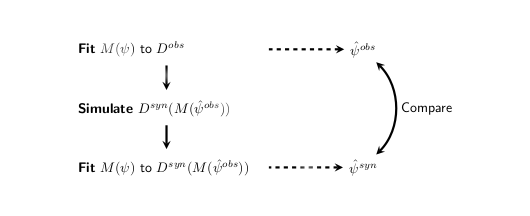

In [13]:
Image(filename='images/monte_carlo.png', width=1000)

$M(\psi)$ denotes the structural model parametrized by $\psi$, which is fit to the observed data $D^{obs}$ to produce an estimated set of parameters $\psi^{obs}$. Using the initial estimates as the parametrization for the Monte Carlo exercise ensures that important features of the data-generating process, such as unobserved variability in agent behaviors and outcomes, are accounted for. 

In Step 2, it is crucial to follow the same estimation approach applied to the original data as closely as possible, for example, choice of starting values. This exercise showcases the performance of the estimator in a favorable setting as the model is correctly specified. If the structural parameters $\psi^{syn}$ are successfully recovered, this is encouraging but does not provide a definite proof of the performance in the observed data. A failure, however, offers reason for concern.

Given the design of the toolbox, implementing the idea is straightforward. Of course, this is not by accident. 

Let us start with a baseline estimation.

In [24]:
%%bash

# Change into the working directory
cd example

# Clean directory
grmToolbox-clean

# Estimate generalized Roy model on 
# dataset.txt
grmToolbox-estimate

Now, let us create a synthetic dataset.

In [ ]:
%%bash

# Change into the working directory
cd example

# Simulate datset with perturbed parameter values
# and store it as simulation.dat (see SIMULATION)
grmToolbox-simulate --init init.ini --update

Let us re-estimate the model.

In [25]:
%%bash

# Change into the working directory
cd example

# Reestimate generalize Roy model using SIMULATION
# as source and starting values from initialization
# file
grmToolbox-estimate --init init.ini --simulation

Let us compare true structural parameters of the simulated sample with the results from the second estimation run.

In [26]:
# Load true and estimated parameters
true_values = np.loadtxt('example/simulation.paras.grm.out')
est_values = np.loadtxt('example/stepParas.grm.out')
start_values = np.loadtxt('example/startParas.grm.out')

# Auxiliary objects
num_paras = len(true_values)

# Formatting
fmt = '{0:10.2f}{1:10.2f}{2:10.2f}{3:10.2f}'

# Print both parameters
print '     Start  Estimate     Truth    Difference \n'
for i in range(num_paras):
            
    start, est, true = start_values[i], est_values[i], true_values[i]

    diff = est - true
    
    print fmt.format(start, est, true, diff)

     Start  Estimate     Truth    Difference 

      0.20      0.20      0.20     -0.00
      0.10      0.11      0.10      0.01
      0.50      0.50      0.50     -0.00
      0.05      0.06      0.05      0.01
      0.10      0.10      0.10      0.00
      0.50      0.50      0.50     -0.00
      0.10      0.10      0.10     -0.00
      0.05      0.05      0.05     -0.00
      0.10      0.07      0.10     -0.03
      0.00      0.03      0.00      0.03
      0.20      0.22      0.20      0.02
     -0.20     -0.15     -0.20      0.05
      0.30      0.26      0.30     -0.04
      0.15      0.15      0.15     -0.00
      0.15      0.14      0.15     -0.01
      0.50      0.48      0.50     -0.02


We can also set up a script that implements the exercise. Please note the use of the [*argparse*](https://docs.python.org/2/library/argparse.html) package, which makes it easy to write user-friendly command-line interface.

In [16]:
display(HTML('images/monte_carlo.html'))

monte_carlo.py 
 

 
 
 
 
 
monte_carlo.py 
 
 

 #!/usr/bin/env python 
 """ This module conducts the Monte Carlo exercise discussed in the 
 lecture. 
""" 
 
 # standard library 
 import os 
 import argparse 
 import numpy as np 
 
 ''' Main functions 
''' 
 def conduct_monte_carlo(init_file): 
 """ This function conducts a Monte Carlo exercise to test the 
 reliabilty of the grmToolbox. 
 """ 
 
 # Clean directory 
 os.system( 'grmToolbox-clean' ) 
 
 # Estimate generalized Roy model on DATA/source 
 os.system( 'grmToolbox-estimate' ) 
 
 # Simulate dataset with perturbed parameter values 
 # and store it as SIMULATION/target 
 os.system( 'grmToolbox-simulate --init init.ini --update' ) 
 
 # Reestimate generalize Roy model using SIMULATION 
 # as source and starting values from initialization 
 # file 
 os.system( 'grmToolbox-estimate --init init.ini --simulation' ) 
 
 
 def process(args): 
 """ Process arguments. 
 """ 
 # Distribute arguments 
 init_file = args.init_file 
 
 # Quality checks 
 assert (isinstance(init_file, str)) 
 
 # Finishing 
 return init_file 
 
 
 def print_results(): 
 """ Print results from Monte Carlo Exercise. 
 """ 
 # Load true and estimated parameters 
 true_values = np.loadtxt( 'simulation.paras.grm.out' ) 
 est_values = np.loadtxt( 'stepParas.grm.out' ) 
 start_values = np.loadtxt( 'startParas.grm.out' ) 
 
 # Auxiliary objects 
 num_paras = len(true_values) 
 
 # Formatting 
 fmt = '{0:10.2f}{1:10.2f}{2:10.2f}{3:10.2f}' 
 
 # Print both parameters 
 print ' Start Estimate Truth Difference \n ' 
 for i in range(num_paras): 
 start, est, true = start_values[i], est_values[i], true_values[i] 
 
 diff = est - true 
 
 print fmt.format(start, est, true, diff) 
 
 
 ''' Execution of module as script. 
''' 
 if __name__ == '__main__' : 
 parser = argparse.ArgumentParser(description= 
 'Conduct Monte Carlo exercise with grmToolbox.' , 
 formatter_class=argparse.ArgumentDefaultsHelpFormatter) 
 
 parser.add_argument( '--init' , action= 'store' , dest= 'init_file' , 
 default= 'init.ini' , 
 help= 'source for model configuration' ) 
 
 args = parser.parse_args() 
 
 init_file = process(args) 
 
 conduct_monte_carlo(init_file) 
 
 print_results()

We can call the script from the command-line.

In [ ]:
%%bash

# Change into the working directory
cd example

# Obtain information about script 
# provided by argparse
./../modules/monte_carlo.py -h

# Run Monte Carlo exercise 
# with default value for
# perturbation
./../modules/monte_carlo.py

## Cleanup

In [28]:
# Create list of all files generated by the notebook
files  = glob.glob('grmToolbox*')

files += glob.glob('example')

files += glob.glob('.pid')

# Remove files
for file_ in files:
    try:
        os.remove(file_)
    except OSError:
        shutil.rmtree(file_)